In [1]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [9]:
!tesseract --help-oem

OCR Engine modes:
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


In [2]:
import cv2
import numpy as np

img = cv2.imread('image.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

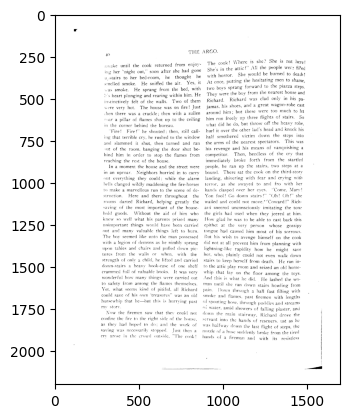

In [3]:
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\Cheng\Downloads\pdf2png\1-1908 Victor Zhang (scan)\1-1908 Victor Zhang (scan)-06.png')



gray = get_grayscale(img)
thresh = thresholding(gray)



plt.imshow(thresh, cmap='Greys_r')
plt.show()






<function matplotlib.pyplot.show(close=None, block=None)>

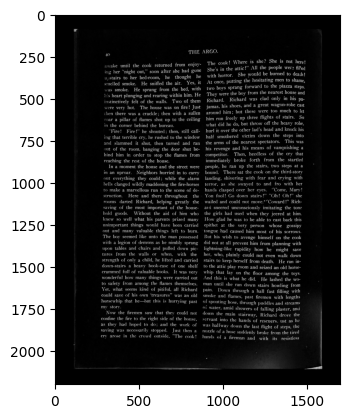

In [8]:
import cv2

# Load the image
img = cv2.imread(r'C:\Users\Cheng\Downloads\pdf2png\1-1908 Victor Zhang (scan)\1-1908 Victor Zhang (scan)-06.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Reverse the colors of the grayscale image
reverse = cv2.bitwise_not(gray)

plt.imshow(reverse, cmap='Greys_r')
plt.show
# Display the original and reversed images side by side
# cv2.imshow('Original', img)
# cv2.imshow('Reversed', reverse)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
import pytesseract
import cv2


pdf_file = r"C:\Users\Cheng\Downloads\1-19-1938 Leela Menon(scan).png"
image = cv2.imread(pdf_file)


data = pytesseract.image_to_data(image, output_type='data.frame', config="--psm 1")


for i, row in data.iterrows():
    
    if row['text'] != '':
        
        x, y, w, h = row['left'], row['top'], row['width'], row['height']
        
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)


cv2.imwrite(r"C:\Users\Cheng\Downloads\Open Peeps - Avatar.png", image)

In [ ]:
#convert to searchable pdf


import pytesseract

custom_oem_psm_config = r'--psm 12'

pdf = pytesseract.image_to_pdf_or_hocr(r'C:\Users\Cheng\Downloads\pdf2png\1-1908 Victor Zhang (scan)\1-1908 Victor Zhang (scan)-06.png', extension='pdf', config= custom_oem_psm_config)
with open(r'C:\Users\Cheng\OneDrive\桌面\WIN History Project\ArgoArchive\PDF2TEXT\test.pdf', 'w+b') as f:
    f.write(pdf)

In [15]:
import cv2 
import pytesseract

img = cv2.imread('1-1908 Victor Zhang (scan)-06.png')

# Adding custom options
custom_config = r'--psm 1'
output = pytesseract.image_to_string(img, config=custom_config)
print(output)

THE ARGO.

40

awake until the cook returned from enjoy-
ing her “night out,” soon after she had gone
upstairs to her bed-room, he thought he
smelled smoke. He sniffed the air. Yes, it
was smoke. He sprang from the bed, with
hs heart plunging and rearing within him. He
instinctively felt of the walls. Two of them
were very hot. The house was on fire! Just
ihen there was a crackle; then with a sullen
roar a pillar of flames shot up to the ceiling
in the corner behind the bureau.

“Fire! Fire!” he shouted; then, still call-
ing that terrible cry, he rushed to the window
and slammed it shut, then turned and ran
out of the room, banging the door shut be-
hind him in order to stop the flames from
reaching the rest of the house.

In a moment the house and the street were
in an uproar. Neighbors hurried in to carry
out everything they could; while the alarm
hells clanged wildly maddening the fire-horses
to make a marvellous run to the scene of de-
struction. Here and there throughout the
room